In [4]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
train_csv_path ='fashion-mnist_train.csv/fashion-mnist_train.csv'
test_csv_path  = 'fashion-mnist_test.csv/fashion-mnist_test.csv'

In [26]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [27]:
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [28]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [29]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

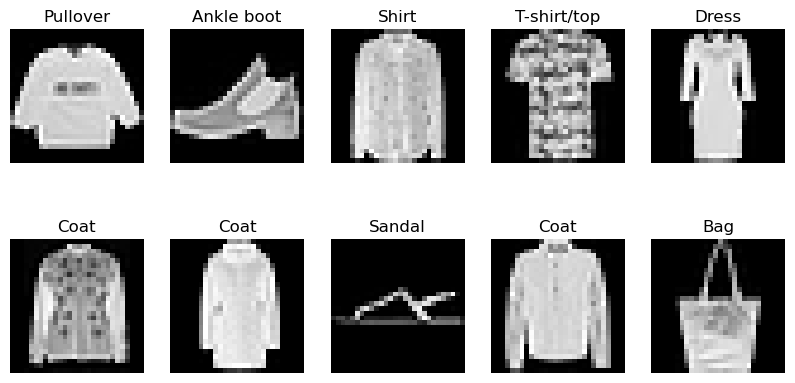

In [31]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.show()

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6965 - loss: 0.8266 - val_accuracy: 0.8603 - val_loss: 0.4007
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8577 - loss: 0.3883 - val_accuracy: 0.8775 - val_loss: 0.3365
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8860 - loss: 0.3212 - val_accuracy: 0.8867 - val_loss: 0.3159
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8976 - loss: 0.2844 - val_accuracy: 0.8845 - val_loss: 0.3071
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9054 - loss: 0.2609 - val_accuracy: 0.8961 - val_loss: 0.2919


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.8972 - loss: 0.2750

Test Accuracy: 0.8972


In [37]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.89      0.79      0.84      1000
           3       0.91      0.92      0.92      1000
           4       0.74      0.93      0.82      1000
           5       0.97      0.98      0.98      1000
           6       0.75      0.64      0.69      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



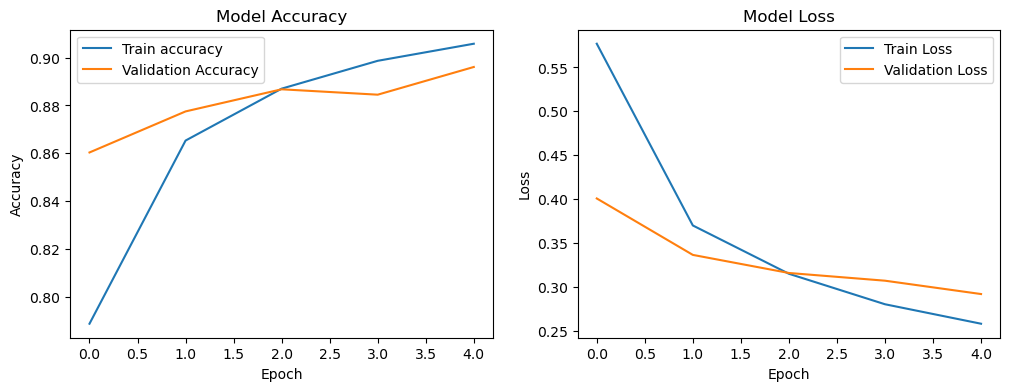

In [39]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

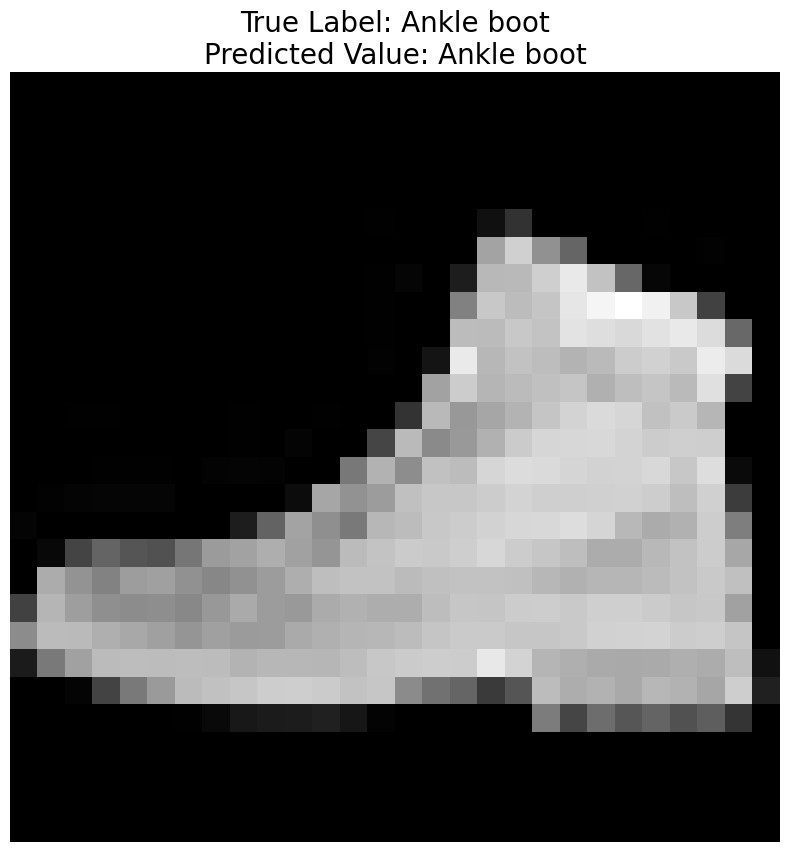

In [40]:
index = 80

true_label = class_names[true_classes[index]]
predicted_label = class_names[predicted_classes[index]]

plt.figure(figsize=[10, 10])
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}\nPredicted Value: {predicted_label}", size=20)
plt.axis('off')
plt.show()